# Import Libraries

In [1]:
# Numerical and Data Handling
import numpy as np
import pandas as pd
import os

# Audio Processing and Visualization
import librosa
import librosa.display

# Plotting
import matplotlib.pyplot as plt
from adopt import ADOPT
import seaborn as sns

# Use tqdm for progress bar
from tqdm import tqdm

# Process files in parallel using joblib
from joblib import Parallel, delayed
    

# IPython Utilities for Jupyter Notebook
from IPython.display import Audio, Image

**KSU emotion preprocessing**


In [2]:
import os
import glob
import pandas as pd
from tqdm.notebook import tqdm

def get_audio_duration(file_path):
    """Get the duration of an audio file in seconds"""
    try:
        duration = librosa.get_duration(path=file_path)
        return duration
    except Exception as e:
        print(f"Error processing file {file_path}: {str(e)}")
        return None
# Emotion encoding dictionary based on folder names (E00 to E05)
emotion_encoding = {
    "E00": 0,  # Neutral
    "E01": 1,  # Happy
    "E02": 2,  # Sad
    "E03": 3,  # Surprise
    "E04": 4,  # Angry
    "E05": 5   # Fear
}

def parse_filename(filename):
    """Parse the filename to extract relevant information"""
    # Example filename: D05E03P104S01T01
    parts = filename.split('/')[-1]  # Get just the filename
    emotion = parts[3:6]  # Get E00-E05
    gender = '1' if parts[7] == '1' else '0'  # Get gender (0 male, 1 female)
    speaker = parts[7:9]  # Get speaker number
    sentence = parts[10:13]  # Get sentence number
    trial = parts[13:]  # Get trial number
    
    return {
        'emotion': emotion,
        'gender': gender,
        'speaker': speaker,
        'sentence': sentence,
        'trial': trial
    }

def load_speech_dataset(base_path):
    data = []
    
    # Define phases
    phases = ['Phase_1', 'Phase_2']
    
    for phase in phases:
        phase_path = os.path.join(base_path, phase)
        
        # Get all emotion folders (E00 to E05)
        emotion_folders = glob.glob(os.path.join(phase_path, 'E*'))
        
        # Iterate over each emotion folder
        for emotion_folder in tqdm(emotion_folders, desc=f"Processing {phase}"):
            emotion_code = os.path.basename(emotion_folder)  # Get E00-E05
            
            # Get all audio files in the emotion folder
            audio_files = glob.glob(os.path.join(emotion_folder, '*'))
            
            for audio_file in audio_files:
                file_info = parse_filename(audio_file)
            
             # Get audio duration
                duration = get_audio_duration(audio_file)
                
                # Create data entry
                data.append({
                    "Path": audio_file,
                    "Emotion": emotion_encoding.get(emotion_code, -1),
                    "Emotion_Label": emotion_code,
                    "Gender": file_info['gender'],
                    "Speaker": file_info['speaker'],
                    "Sentence": file_info['sentence'],
                    "Trial": file_info['trial'],
                    "Phase": phase,
                    "Duration": duration
                })
    
    # Convert the list into a DataFrame
    df = pd.DataFrame(data)
    return df

# Use the function to load the dataset
# Replace with your actual base path
base_path = '/home/ali/AR-Emotion-Recognition/ksu_emotions/data/SPEECH'
ksu_emotions_df = load_speech_dataset(base_path)

# Display first few rows of the DataFrame
print(ksu_emotions_df.head())

Processing Phase_1:   0%|          | 0/5 [00:00<?, ?it/s]

Processing Phase_2:   0%|          | 0/5 [00:00<?, ?it/s]

                                                Path  Emotion Emotion_Label  \
0  /home/ali/AR-Emotion-Recognition/ksu_emotions/...        1           E01   
1  /home/ali/AR-Emotion-Recognition/ksu_emotions/...        1           E01   
2  /home/ali/AR-Emotion-Recognition/ksu_emotions/...        1           E01   
3  /home/ali/AR-Emotion-Recognition/ksu_emotions/...        1           E01   
4  /home/ali/AR-Emotion-Recognition/ksu_emotions/...        1           E01   

  Gender Speaker Sentence     Trial    Phase  Duration  
0      0      00      S06  T01.flac  Phase_1     4.480  
1      1      10      S03  T01.flac  Phase_1     7.424  
2      0      00      S16  T01.flac  Phase_1     4.864  
3      0      00      S16  T01.flac  Phase_1     6.080  
4      1      10      S09  T01.flac  Phase_1     6.272  


In [ ]:
import os
import glob
import pandas as pd
import librosa
import numpy as np
from tqdm.notebook import tqdm

# [Previous code remains the same until the DataFrame is created]

# After creating the DataFrame, add these analyses:

def analyze_durations(df):
    """Analyze durations across different categories"""
    
    print("\n=== Duration Analysis ===")
    
    # Overall statistics
    print("\nOverall Duration Statistics:")
    print(f"Mean Duration: {df['Duration'].mean():.2f} seconds")
    print(f"Max Duration: {df['Duration'].max():.2f} seconds")
    print(f"Min Duration: {df['Duration'].min():.2f} seconds")
    print(f"Standard Deviation: {df['Duration'].std():.2f} seconds")
    
    # By Emotion
    print("\nDuration Statistics by Emotion:")
    emotion_stats = df.groupby('Emotion_Label').agg({
        'Duration': ['mean', 'max', 'min', 'count']
    })
    print(emotion_stats)
    
    # By Phase
    print("\nDuration Statistics by Phase:")
    phase_stats = df.groupby('Phase').agg({
        'Duration': ['mean', 'max', 'min', 'count']
    })
    print(phase_stats)
    
    # By Gender
    print("\nDuration Statistics by Gender:")
    gender_stats = df.groupby('Gender').agg({
        'Duration': ['mean', 'max', 'min', 'count']
    })
    print(gender_stats)
    
    # Create summary statistics DataFrame
    summary_stats = pd.DataFrame({
        'Category': ['Overall'] + list(emotion_stats.index) + list(phase_stats.index) + list(gender_stats.index),
        'Mean_Duration': [df['Duration'].mean()] + 
                        list(emotion_stats['Duration']['mean']) + 
                        list(phase_stats['Duration']['mean']) + 
                        list(gender_stats['Duration']['mean']),
        'Max_Duration': [df['Duration'].max()] + 
                       list(emotion_stats['Duration']['max']) + 
                       list(phase_stats['Duration']['max']) + 
                       list(gender_stats['Duration']['max']),
        'Count': [len(df)] + 
                list(emotion_stats['Duration']['count']) + 
                list(phase_stats['Duration']['count']) + 
                list(gender_stats['Duration']['count'])
    })
    
    # Save statistics to CSV
    summary_stats.to_csv('duration_statistics.csv', index=False)
    print("\nStatistics saved to 'duration_statistics.csv'")
    
    return summary_stats



# Analyze durations
summary_stats = analyze_durations(ksu_emotions_df)

# Additional visualizations using matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

def plot_duration_distributions(df):
    """Create visualizations for duration distributions"""
    
    # Set up the plotting style
    plt.style.use('seaborn-v0_8')
    
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(15, 10))
    
    # 1. Duration distribution (histogram)
    plt.subplot(2, 2, 1)
    sns.histplot(data=df, x='Duration', bins=30)
    plt.title('Distribution of Audio Durations')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Count')
    
    # 2. Box plot by emotion
    plt.subplot(2, 2, 2)
    sns.boxplot(data=df, x='Emotion_Label', y='Duration')
    plt.title('Duration Distribution by Emotion')
    plt.xlabel('Emotion')
    plt.ylabel('Duration (seconds)')
    
    # 3. Box plot by phase
    plt.subplot(2, 2, 3)
    sns.boxplot(data=df, x='Phase', y='Duration')
    plt.title('Duration Distribution by Phase')
    plt.xlabel('Phase')
    plt.ylabel('Duration (seconds)')
    
    # 4. Box plot by gender
    plt.subplot(2, 2, 4)
    sns.boxplot(data=df, x='Gender', y='Duration')
    plt.title('Duration Distribution by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Duration (seconds)')
    
    plt.tight_layout()
    plt.savefig('duration_analysis.png')
    plt.close()
    
    print("\nPlots saved as 'duration_analysis.png'")

# Create visualizations
plot_duration_distributions(ksu_emotions_df)

# Print some additional statistics
print("\n=== Additional Statistics ===")
print(f"\nTotal number of files: {len(ksu_emotions_df)}")
print(f"Number of unique speakers: {ksu_emotions_df['Speaker'].nunique()}")
print(f"Number of unique sentences: {ksu_emotions_df['Sentence'].nunique()}")
print(f"Number of unique trials: {ksu_emotions_df['Trial'].nunique()}")

# Calculate total duration
total_duration = ksu_emotions_df['Duration'].sum()
print(f"\nTotal duration of all audio: {total_duration:.2f} seconds ({total_duration/3600:.2f} hours)")




EYASE preprocessing


In [ ]:
import os
import glob
import pandas as pd
from tqdm.notebook import tqdm  # For progress bar

# Emotion encoding dictionary


def EYASE_dataset(path):
    emotion_encoding = {
    "neu": 0,
    "hap": 1,
    "sad": 2,
    "ang": 3,
    # Add more emotions if necessary
}
    data = []
    # Get all subfolders inside the main path
    all_folders_directory = glob.glob(os.path.join(path, '*'))
    
    # Iterate over each subfolder
    for folder in tqdm(all_folders_directory, desc="Processing Folders"):
        # Get all files inside the subfolder
        sub_folder = glob.glob(os.path.join(folder, '*'))
        
        # Iterate over each audio file
        for audio_file in sub_folder:
            # Extract the emotion from the filename
            filename = os.path.basename(audio_file)
            emotion = filename.split('_')[-1].split(' ')[0].split('(')[0]
            
            # Print the raw emotion (this is useful for debugging)
            print(f"Raw emotion extracted: {emotion}")
            
            # Encode the emotion using the emotion_encoding dictionary
            encoded_emotion = emotion_encoding.get(emotion, -1)  # Default to -1 if emotion not found
            
            # Append the file data to the list
            data.append({
                "Path": audio_file,
                "Emotion": encoded_emotion,            # The raw emotion string
               
            })
    
    # Convert the list into a DataFrame
    df = pd.DataFrame(data)
    return df

# Use the function to load the dataset from your directory
EYASE_df = EYASE_dataset('/home/ali/AR-Emotion-Recognition/data/EYASE')

# Display first few rows of the DataFrame


In [ ]:
EYASE_df

BAVED preprocesing

In [ ]:
# Emotion Label Mapping
EMOTIONS = {
    0: 'low',
    1: 'neutral',
    2: 'high'
}

# Paths and Constants
DATA_PATH = '/home/ali.abouzeid/AR-Emotion-Recognition/content/BAVE/'
SAMPLE_RATE = 16_000  # 16kHz is optimal for speech-based emotion recognition

# Print confirmation of configuration
print(f"Data Path: {DATA_PATH}")
print(f"Sample Rate: {SAMPLE_RATE} Hz")
print(f"Emotion Labels: {EMOTIONS}")

from tqdm import tqdm_notebook

def Bave_dataset(path):
  data = []
  all_folders_directory = glob.glob(path)
  for folder in tqdm_notebook(all_folders_directory):
    sub_folder = glob.glob(folder+"/*")
    for wave_file in sub_folder:
      data.append({
          "name":wave_file,
          "emotion" : wave_file.split("-")[-2]
      })

  df = pd.DataFrame(data)
  return df

Bave_df = Bave_dataset('/home/ali.abouzeid/AR-Emotion-Recognition/content/BAVE/remake/*')
Bave_df.head()


In [3]:
SAMPLE_RATE = 16_000  # 16kHz is optimal for speech-based emotion recognition

Data = ksu_emotions_df.copy() #ksu_emotions_df #Bave_df, EYASE_df

from sklearn.model_selection import train_test_split

# Split while maintaining label proportions
train_df, test_df = train_test_split(Data, 
                                    test_size=0.1, 
                                    random_state=455,
                                    stratify=Data.Emotion)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
del Data

In [4]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold

SAMPLE_RATE = 16_000  # 16kHz is optimal for speech-based emotion recognition

Data = ksu_emotions_df.copy()  # Assuming ksu_emotions_df is your DataFrame

# Initialize StratifiedKFold with 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=455)

# Create a list to store the train and test DataFrames for each fold
folds = []

# Iterate through the folds
for train_index, test_index in skf.split(Data, Data['Emotion']):
    train_df = Data.iloc[train_index].reset_index(drop=True)
    test_df = Data.iloc[test_index].reset_index(drop=True)
    folds.append((train_df, test_df))

# Now 'folds' contains 5 tuples, each with a train and test DataFrame
# You can access them like this:
# folds[0][0]  # Train DataFrame for the first fold
# folds[0][1]  # Test DataFrame for the first fold
# folds[1][0]  # Train DataFrame for the second fold, and so on...

# SPECTOGRAM LAB

> Add blockquote



In [5]:
del Data, ksu_emotions_df

In [ ]:
# Added By Mohamed To get the whole length of all signals No Need to run again 
import seaborn as sns
length_data = len(test_df)
audio_length =np.zeros(length_data)

for i in range (0,length_data):
    audio, _= librosa.load(test_df.loc[i, 'Path'], offset=0.5, sr=SAMPLE_RATE)
    audio_length[i] = audio.size

# Added By Mohamed To get Familiar with the distribution of all signals No Need to run again

# Box Plot
plt.figure(figsize=(10, 6))
plt.boxplot(audio_length)
plt.title('Box Plot of Audio Lengths')
plt.ylabel('Audio Length')
plt.grid(True, alpha=0.3)
plt.show()

# Histogram + KDE combined using seaborn
durations = audio_length/SAMPLE_RATE
plt.figure(figsize=(10, 6))
sns.histplot(data=durations, kde=True, bins=50)
plt.title('Distribution of Audio Lengths (Histogram + KDE)')
plt.xlabel('Audio Length')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

# Basic statistics
print("Basic Statistics:")
print(f"Mean: {np.mean(durations):.2f}")
print(f"Median: {np.median(durations):.2f}")
print(f"Std Dev: {np.std(durations):.2f}")
print(f"Min: {np.min(durations):.2f}")
print(f"Max: {np.max(durations):.2f}")


In [6]:
def get_log_mel_spectrogram(
    audio,
    sample_rate,
    n_fft=2048,
    hop_length=256,
    n_mels=128,
    fmin=80,
    fmax=7600,
    window='hann'
):
    """
    Compute the Log-Mel spectrogram of an audio signal.

    Parameters:
    - audio (np.ndarray): Audio time series.
    - sample_rate (int): Sampling rate of the audio signal.
    - n_fft (int): Length of the FFT window.
    - hop_length (int): Number of samples between successive frames.
    - n_mels (int): Number of Mel bands to generate.
    - fmin (float): Lowest frequency (in Hz).
    - fmax (float): Highest frequency (in Hz).
    - window (str): Window function to apply (e.g., 'hann', 'hamming').

    Returns:
    - mel_spec_db (np.ndarray): Log-Mel spectrogram (in dB).
    """
    # Compute Mel spectrogram
    mel_spec = librosa.feature.melspectrogram(
        y=audio,
        sr=sample_rate,
        n_fft=n_fft,
        hop_length=hop_length,
        win_length=n_fft,
        window=window,
        n_mels=n_mels,
        fmin=fmin,
        fmax=fmax,
        power=2.0  # Power spectrogram (default)
    )

    # Convert to log scale (dB)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    return mel_spec_db

5

In [23]:
i = 0
train_df = folds[i][0]
test_df = folds[i][1]

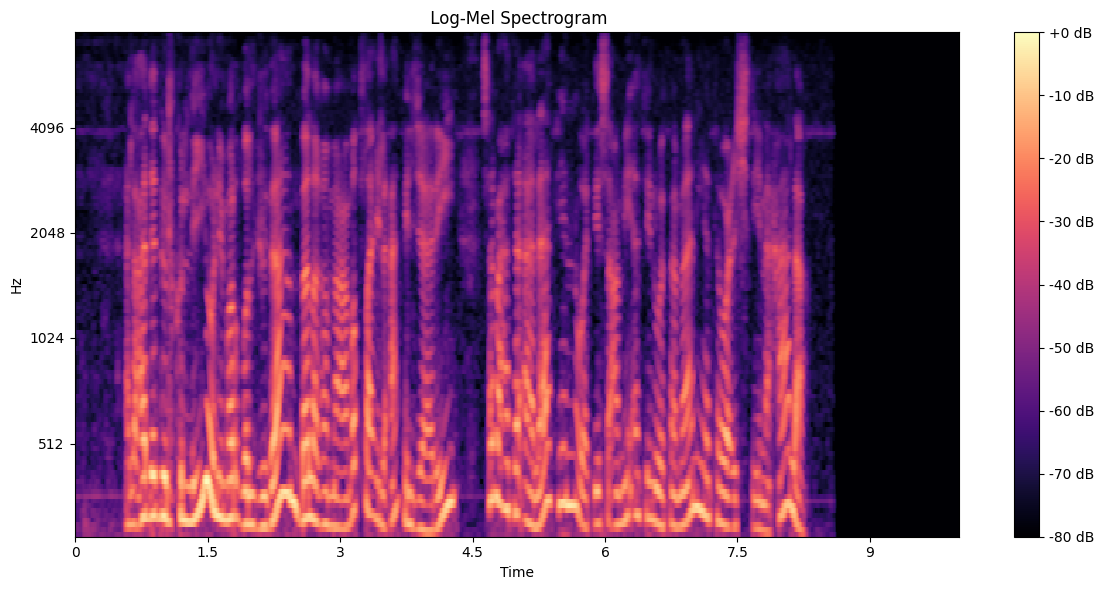

In [7]:
duration = 10
audio, sample_rate = librosa.load(train_df.loc[7, 'Path'], duration=duration, offset=0.5, sr=SAMPLE_RATE)


# Zero-padding the signal for a consistent 3-second input
signal = np.zeros(int(SAMPLE_RATE * duration))
signal[:len(audio)] = audio

# Compute the optimized Log-Mel spectrogram

mel_spectrogram = get_log_mel_spectrogram(signal, SAMPLE_RATE)
#mel_spectrogram = mel_spectrograms[7800]
# Visualize the spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(
    mel_spectrogram,
    sr=SAMPLE_RATE,
    hop_length=256,
    y_axis='mel',
    x_axis='time',
    fmin=80,
    fmax=7600
)
plt.colorbar(format='%+2.0f dB')
plt.title(' Log-Mel Spectrogram')
plt.tight_layout()


In [ ]:
def sigToSpectogram(data, final_shape, duration = 5 ,sample_rate=22500):
    """
    Perform sigToSpectogram on audio files and compute mel spectrograms.
    
    Args:
        data: DataFrame containing audio file paths
        num_augmentations: Number of augmentations per sample
        sample_rate: Audio sample rate
    
    Returns:
        tuple: (mel_spectrograms, signals)
        - mel_spectrograms: numpy array of mel spectrograms
        - signals: list of audio signals
    """
    
 
    
    # Preallocate arrays
    mel_spectrograms = np.empty(final_shape, dtype=np.float32)
    signals = []
    
    def process_file(file_path):
        try:
            # Load audio file
            audio, _ = librosa.load(
                file_path, 
                duration=duration, 
                offset=0.5, 
                sr=sample_rate,
                res_type='kaiser_fast'  # Faster resampling
            )
            
            # Zero-pad signal
            signal = np.zeros(int(sample_rate * duration), dtype=np.float32)
            signal[:len(audio)] = audio
            
            # Compute mel spectrogram
            mel_spec = get_log_mel_spectrogram(signal, sample_rate=sample_rate)
            
            return mel_spec, signal
            
        except Exception as e:
            print(f"Error processing {file_path}: {str(e)}")
            return None, None

    # Process files in parallel
    results = Parallel(n_jobs=-1)(
        delayed(process_file)(file_path) 
        for file_path in tqdm(data.Path, desc="Processing audio files")
    )
    
    # Store results in mel_spectrograms array and signals list
    for i, (mel_spec, signal) in enumerate(results):
        if mel_spec is not None:
            mel_spectrograms[i] = mel_spec
            signals.append(signal)
    
    # Convert signals list to numpy array for consistency
    signals = np.array(signals, dtype=np.float32)
    
    return mel_spectrograms, signals

#mel_spectrograms = []
num_augmentations = 2
final_shape = (train_df.shape[0], mel_spectrogram.shape[0], mel_spectrogram.shape[1])

mel_spectrograms, signals = sigToSpectogram(data=train_df,final_shape=final_shape,duration=duration,sample_rate=SAMPLE_RATE)

test_shape = (test_df.shape[0], mel_spectrogram.shape[0], mel_spectrogram.shape[1])
mel_spectrograms_test, _ = sigToSpectogram(data=test_df,final_shape=test_shape,duration=duration,sample_rate=SAMPLE_RATE)

Processing audio files:   0%|          | 0/2948 [00:00<?, ?it/s]

Processing audio files:   0%|          | 0/328 [00:00<?, ?it/s]

In [ ]:
# #mel_spectrograms = []
# num_augmentations = 2
# final_shape = ( (num_augmentations+ 1)* train_df.shape[0], mel_spectrogram.shape[0], mel_spectrogram.shape[1])
# mel_spectrograms = np.empty(final_shape)
# mel_spectrograms.shape

# signals = []

# # Loop through all file paths in the dataset
# for i, file_path in enumerate(train_df.Path):
#     # Load audio file with specified duration and offset
#     audio, _ = librosa.load(file_path, duration=duration, offset=0.5, sr=SAMPLE_RATE)

#     # Zero-pad the signal to ensure consistent length (3 seconds)
#     signal = np.zeros(int(SAMPLE_RATE * duration))
#     signal[:len(audio)] = audio
#     signals.append(signal)

#     # Compute the Log-Mel spectrogram using the get_log_mel_spectrogram function
#     mel_spectrogram = get_log_mel_spectrogram(signal, sample_rate=SAMPLE_RATE)
    
#     #mel_spectrograms.append(mel_spectrogram)
    
#     mel_spectrograms[i] = mel_spectrogram

#     # Print progress
#     print(f"\rProcessed {i + 1}/{len(train_df.Path)} files", end='')

# # Print a final message after completion
# print("\nProcessing complete.")


In [ ]:
# #mel_spectrograms = []
# # get log of test df
# num_augmentations = 2
# final_shape = (test_df.shape[0], mel_spectrogram.shape[0], mel_spectrogram.shape[1])
# mel_spectrograms_test = np.zeros(final_shape)

# # signals_test = []

# # Loop through all file paths in the dataset
# for i, file_path in enumerate(test_df.Path):
#     # Load audio file with specified duration and offset
#     audio, _ = librosa.load(file_path, duration=duration, offset=0.5, sr=SAMPLE_RATE)

#     # Zero-pad the signal to ensure consistent length (3 seconds)
#     signal = np.zeros(int(SAMPLE_RATE * duration))
#     signal[:len(audio)] = audio
#     # signals_test.append(signal)

#     # Compute the Log-Mel spectrogram using the get_log_mel_spectrogram function
#     mel_spectrogram = get_log_mel_spectrogram(signal, sample_rate=SAMPLE_RATE)
    
#     #mel_spectrograms.append(mel_spectrogram)
    
#     mel_spectrograms_test[i] = mel_spectrogram

#     # Print progress
#     print(f"\rProcessed {i + 1}/{len(test_df.Path)} files", end='')

# # Print a final message after completion
# print("\nProcessing complete.")


In [ ]:

def addAWGN(signals, num_bits=16, augmented_num=1, snr_low=15, snr_high=30):
    # Assuming signals is a 2D array with shape (num_signals, signal_length)
    num_signals, signal_len = signals.shape
    
    # Generate White Gaussian noise
    # Shape: (num_signals, augmented_num, signal_len)
    noise = np.random.normal(size=(num_signals, augmented_num, signal_len))
    
    # Normalize signals and noise
    norm_constant = 2.0**(num_bits-1)
    signals_norm = signals / norm_constant  # Shape: (num_signals, signal_len)
    noise_norm = noise / norm_constant      # Shape: (num_signals, augmented_num, signal_len)
    
    # Compute signal and noise power
    s_power = np.sum(signals_norm ** 2, axis=1) / signal_len  # Shape: (num_signals,)
    n_power = np.sum(noise_norm ** 2, axis=2) / signal_len    # Shape: (num_signals, augmented_num)
    
    # Random SNR: Uniform [15, 30] in dB
    target_snr = np.random.randint(snr_low, snr_high, size=(num_signals, augmented_num))
    
    # Compute K (covariance matrix) for each noise
    # Shape: (num_signals, augmented_num)
    K = np.sqrt((s_power[:, np.newaxis] / n_power) * 10 ** (- target_snr / 10))
    
    # Expand K to match noise dimensions
    # Shape: (num_signals, augmented_num, signal_len)
    K_expanded = np.expand_dims(K, axis=2) * np.ones((1, 1, signal_len))
    
    # Generate noisy signals
    # Shape: (num_signals, augmented_num, signal_len)
    noisy_signals = signals[:, np.newaxis, :] + K_expanded * noise
    
    return noisy_signals

def batch_addAWGN_with_spectogram(signals, sample_rate=22500, num_bits=16, augmented_num=1, snr_low=15, snr_high=30, batch_size=None):
    num_signals = signals.shape[0]
    signal_len = signals.shape[1]

    if batch_size is None:
        batch_size = num_signals // 4
    
    
    augmented_specs = []
    
    # Process in batches
    for start_idx in range(0, num_signals, batch_size):
        end_idx = min(start_idx + batch_size, num_signals)
        batch = signals[start_idx:end_idx]
        
        # Apply AWGN to the batch
        noisy_batch = addAWGN(batch, 
                             num_bits=num_bits, 
                             augmented_num=1,
                             snr_low=snr_low, 
                             snr_high=snr_high)
        print(noisy_batch.shape)
        
        # Reshape to 2D: (batch_size, signal_length)
        noisy_batch = noisy_batch.reshape(-1, signal_len)
        print(noisy_batch.shape)

        
        # Convert to spectrograms
        specs = np.array([get_log_mel_spectrogram(signal, sample_rate=sample_rate) 
                         for signal in noisy_batch])
        
        augmented_specs.append(specs)
    
    # Combine all batches
    return np.vstack(augmented_specs)

def create_multiple_augmentations_with_specs(signals, mel_spectrograms, labels, num_augmentations, sample_rate=22500, **kwargs):
    # Convert original signals to spectrograms
    original_specs = mel_spectrograms
    all_specs = [original_specs]
    all_labels = [labels]
    
    for _ in range(num_augmentations):
        augmented_specs = batch_addAWGN_with_spectogram(signals, sample_rate=sample_rate, **kwargs)
        all_specs.append(augmented_specs)
        all_labels.append(labels)
    
    # Combine all augmentations and labels
    augmented_specs = np.vstack(all_specs)
    augmented_labels = np.concatenate(all_labels)
    
    return augmented_specs, augmented_labels

# With saving to disk:
def create_multiple_augmentations_with_specs_save(signals, mel_spectrograms, labels, num_augmentations, save_path, sample_rate=22500, **kwargs):
    # Convert and save original spectrograms and labels
    original_specs = mel_spectrograms
    np.save(f"{save_path}/original_specs.npy", original_specs)
    np.save(f"{save_path}/original_labels.npy", labels)
    
    for i in range(num_augmentations):
        augmented_specs = batch_addAWGN_with_spectogram(signals, sample_rate=sample_rate, **kwargs)
        # Save each augmentation and its labels
        np.save(f"{save_path}/augmentation_specs_{i}.npy", augmented_specs)
        np.save(f"{save_path}/augmentation_labels_{i}.npy", labels)




labels = np.array(train_df.Emotion)
batch_size = signals.shape[0] // 2
num_augmentations = 2

augmented_specs, augmented_labels = create_multiple_augmentations_with_specs(
    signals,
    mel_spectrograms,
    labels,
    num_augmentations=num_augmentations,
    batch_size=batch_size,
    snr_low=15,
    snr_high=30
)

del mel_spectrograms, signals, train_df



### Augment signals (by adding AWGN) and calculate

*   List item
*   List item

mel spectrograms¶

In [ ]:
def addAWGN(signal, num_bits=16, augmented_num=num_augmentations, snr_low=15, snr_high=30):
    signal_len = len(signal)
    # Generate White Gaussian noise
    noise = np.random.normal(size=(augmented_num, signal_len))
    # Normalize signal and noise
    norm_constant = 2.0**(num_bits-1)
    signal_norm = signal / norm_constant
    noise_norm = noise / norm_constant
    # Compute signal and noise power
    s_power = np.sum(signal_norm ** 2) / signal_len
    n_power = np.sum(noise_norm ** 2, axis=1) / signal_len
    # Random SNR: Uniform [15, 30] in dB
    target_snr = np.random.randint(snr_low, snr_high)
    # Compute K (covariance matrix) for each noise
    K = np.sqrt((s_power / n_power) * 10 ** (- target_snr / 10))
    K = np.ones((signal_len, augmented_num)) * K
    # Generate noisy signal
    
    return signal + K.T * noise

def addAWGN_with_duration(signal, duration=duration, num_bits=16, augmented_num=num_augmentations, snr_low=15, snr_high=30):
    #signal_len = len(signal)
    
    signal_len = min(int((duration / 10) * signal_len), signal_len)
    # Generate White Gaussian noise
    noise = np.random.normal(size=(augmented_num, signal_len))
    # Normalize signal and noise
    norm_constant = 2.0**(num_bits-1)
    signal_norm = signal / norm_constant
    noise_norm = noise / norm_constant
    # Compute signal and noise power
    s_power = np.sum(signal_norm ** 2) / signal_len
    n_power = np.sum(noise_norm ** 2, axis=1) / signal_len
    # Random SNR: Uniform [15, 30] in dB
    target_snr = np.random.randint(snr_low, snr_high)
    # Compute K (covariance matrix) for each noise
    K = np.sqrt((s_power / n_power) * 10 ** (- target_snr / 10))
    K = np.ones((signal_len, augmented_num)) * K


    # Generate noisy signal

    # Determine the target length
    target_length = signal.shape[0]  # 160000

    # Pad array2 and array3 with zeros
    k_T = np.pad(K.T, ((0, 0), (0, target_length - K.T.shape[1])), mode='constant', constant_values=0)
    noise = np.pad(noise, ((0, 0), (0, target_length - noise.shape[1])), mode='constant', constant_values=0)
    print(signal.shape, k_T.shape, noise.shape)
    return signal +  k_T  * noise



k = train_df.shape[0]
for i,signal in enumerate(signals):
    #augmented_signals = addAWGN(signal)

    augmented_signals = addAWGN_with_duration(signal, duration=train_df.Duration[i])
    for j in range(augmented_signals.shape[0]):
        mel_spectrogram = get_log_mel_spectrogram(augmented_signals[j,:], sample_rate=SAMPLE_RATE)       
        mel_spectrograms[k] = mel_spectrogram
        k += 1
        train_df = pd.concat([train_df, train_df.iloc[i:i+1]], ignore_index=True)
    print("\r Processed {}/{} files".format(i,len(signals)),end='')



(160000,) (2, 160000) (2, 160000)
 Processed 0/2948 files(160000,) (2, 160000) (2, 160000)
 Processed 1/2948 files(160000,) (2, 160000) (2, 160000)
 Processed 2/2948 files(160000,) (2, 160000) (2, 160000)
 Processed 3/2948 files(160000,) (2, 160000) (2, 160000)
 Processed 4/2948 files(160000,) (2, 160000) (2, 160000)
 Processed 5/2948 files(160000,) (2, 160000) (2, 160000)
 Processed 6/2948 files(160000,) (2, 160000) (2, 160000)
 Processed 7/2948 files(160000,) (2, 160000) (2, 160000)
 Processed 8/2948 files(160000,) (2, 160000) (2, 160000)
 Processed 9/2948 files(160000,) (2, 160000) (2, 160000)
 Processed 10/2948 files(160000,) (2, 160000) (2, 160000)
 Processed 11/2948 files(160000,) (2, 160000) (2, 160000)
 Processed 12/2948 files(160000,) (2, 160000) (2, 160000)
 Processed 13/2948 files(160000,) (2, 160000) (2, 160000)
 Processed 14/2948 files(160000,) (2, 160000) (2, 160000)
 Processed 15/2948 files(160000,) (2, 160000) (2, 160000)
 Processed 16/2948 files(160000,) (2, 160000) (2

# Models


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        
        # Initialize positional encoding matrix
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(
            torch.arange(0, d_model, 2).float() * (-torch.log(torch.tensor(10000.0)) / d_model)
        )
        
        # Apply sinusoidal functions
        pe[:, 0::2] = torch.sin(position * div_term)  # Even indices
        pe[:, 1::2] = torch.cos(position * div_term)  # Odd indices
        
        pe = pe.unsqueeze(0)  # Shape: (1, max_len, d_model)
        self.register_buffer('pe', pe)
        
    def forward(self, x):
        # Add positional encoding to input
        x = x + self.pe[:, :x.size(1), :]
        return x

class ImprovedEmotionRecognitionModel(nn.Module):
    def __init__(self, num_emotions, input_height):
        super(ImprovedEmotionRecognitionModel, self).__init__()

        # Convolutional layers for feature extraction
        self.conv_block = nn.Sequential(
            # First convolutional block
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),  # Increased channels for richer features
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),  # Output: (32, H/2, W/2)
            nn.Dropout(p=0.3),

            # Second convolutional block
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),  # Output: (64, H/4, W/4)
            nn.Dropout(p=0.3),

            # Third convolutional block
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),  # Output: (128, H/8, W/8)
            nn.Dropout(p=0.3),
        )

        # Calculate the output height after convolution and pooling layers
        conv_output_height = input_height // (2 ** 3)  # Divided by 8 due to three MaxPool layers

        # Fully connected layer to adjust dimensions before Transformer
        self.fc1 = nn.Linear(128 * conv_output_height, 256)
        self.dropout_fc1 = nn.Dropout(p=0.3)

        # Positional Encoding
        self.positional_encoding = PositionalEncoding(d_model=256, max_len=5000)

        # Transformer Encoder
        transformer_layer = nn.TransformerEncoderLayer(
            d_model=256, nhead=8, dim_feedforward=512, dropout=0.3, batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(transformer_layer, num_layers=4)

        # Output layer
        self.fc2 = nn.Linear(256, num_emotions)
        # No need for a softmax layer if using CrossEntropyLoss

    def forward(self, x):
        # x shape: (batch_size, 1, freq_bins, time_steps)
        batch_size = x.size(0)

        # CNN feature extraction
        x = self.conv_block(x)
        # x shape: (batch_size, channels, reduced_freq_bins, reduced_time_steps)

        # Prepare data for the Transformer
        x = x.permute(0, 3, 1, 2)  # Shape: (batch_size, time_steps, channels, freq_bins)
        x = x.contiguous().view(batch_size, x.size(1), -1)  # Flatten channels and freq_bins
        # x shape: (batch_size, time_steps, features)

        # Fully connected layer
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout_fc1(x)
        # x shape: (batch_size, time_steps, 256)

        # Add positional encoding
        x = self.positional_encoding(x)

        # Transformer Encoder
        x = self.transformer_encoder(x)  # Shape: (batch_size, time_steps, 256)

        # Global average pooling over the time dimension
        x = x.mean(dim=1)  # Shape: (batch_size, 256)

        # Output layer
        logits = self.fc2(x)

        return logits  # Return raw logits

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class EmotionRecognitionModel(nn.Module):
    def __init__(self, num_emotions, input_height):
        super(EmotionRecognitionModel, self).__init__()

        # Convolutional layers for feature extraction
        self.conv_block = nn.Sequential(
            # First conv block
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),  # Output: (16, H, W)
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),  # Output: (16, H/2, W/2)
            nn.Dropout(p=0.3),

            # Second conv block
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),  # Output: (32, H/2, W/2)
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),  # Output: (32, H/4, W/4)
            nn.Dropout(p=0.3),

            # Third conv block
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),  # Output: (64, H/4, W/4)
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),  # Output: (64, H/8, W/8)
            nn.Dropout(p=0.3),
        )

        # Calculate the output height after convolution and pooling layers
        # Assuming input_height is known and consistent
        conv_output_height = input_height // (2 ** 3)  # Divided by 8 due to three MaxPool layers

        # Fully connected layer to reduce dimensionality before LSTM
        self.fc1 = nn.Linear(64 * conv_output_height, 128)
        self.dropout_fc1 = nn.Dropout(p=0.3)

        # Bidirectional LSTM
        self.bilstm = nn.LSTM(input_size=128, hidden_size=64, num_layers=2,
                              batch_first=True, bidirectional=True, dropout=0.3)

        # Attention layer
        self.attention_layer = nn.Linear(64 * 2, 1)

        # Output layer
        self.fc2 = nn.Linear(64 * 2, num_emotions)
        # No need for softmax layer if using CrossEntropyLoss

    def forward(self, x):
        # x shape: (batch_size, 1, freq_bins, time_steps)

        batch_size = x.size(0)

        # CNN feature extraction
        x = self.conv_block(x)
        # x shape: (batch_size, channels, freq_bins', time_steps')

        # Prepare for LSTM
        x = x.permute(0, 3, 1, 2)  # Shape: (batch_size, time_steps', channels, freq_bins')
        x = x.contiguous().view(batch_size, x.size(1), -1)  # Flatten channels and freq_bins

        # Fully connected layer
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout_fc1(x)

        # BiLSTM
        lstm_out, _ = self.bilstm(x)  # Shape: (batch_size, time_steps', hidden_size*2)

        # Attention mechanism
        attn_weights = F.softmax(self.attention_layer(lstm_out), dim=1)  # (batch_size, time_steps', 1)
        attn_weights = attn_weights.permute(0, 2, 1)  # (batch_size, 1, time_steps')

        # Weighted sum of LSTM outputs
        attn_output = torch.bmm(attn_weights, lstm_out)  # (batch_size, 1, hidden_size*2)
        attn_output = attn_output.squeeze(1)  # (batch_size, hidden_size*2)

        # Output layer
        logits = self.fc2(attn_output)

        return logits  # Return logits directly

# Initialize model
#num_emotions = np.unique(augmented_labels).shape[0]



In [4]:

# Define the loss function once
loss_fn = nn.CrossEntropyLoss()

def make_train_step(model, optimizer):
    def train_step(X, Y):
        # Set model to train mode
        model.train()

        # Move data to the same device as model
        X = X.to(next(model.parameters()).device)
        Y = Y.to(next(model.parameters()).device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        output_logits = model(X)

        # Compute loss
        loss = loss_fn(output_logits, Y)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Compute predictions and accuracy
        with torch.no_grad():
            predictions = torch.argmax(output_logits, dim=1)
            correct = (predictions == Y).sum().item()
            accuracy = correct / Y.size(0) * 100.0

        return loss.item(), accuracy
    return train_step

def make_validate_fnc(model):
    def validate(X, Y):
        model.eval()
        with torch.no_grad():
            # Move data to the same device as model
            X = X.to(next(model.parameters()).device)
            Y = Y.to(next(model.parameters()).device)

            output_logits = model(X)
            loss = loss_fn(output_logits, Y)
            predictions = torch.argmax(output_logits, dim=1)
            correct = (predictions == Y).sum().item()
            accuracy = correct / Y.size(0) * 100.0
        return loss.item(), accuracy, predictions
    return validate


In [ ]:
# def loss_fnc(predictions, targets):
#     return nn.CrossEntropyLoss()(input=predictions,target=targets)

In [ ]:
# def make_train_step(model, loss_fnc, optimizer):
#     def train_step(X,Y):
#         # set model to train mode
#         model.train()
#         # forward pass
#         output_logits, output_softmax = model(X)
#         predictions = torch.argmax(output_softmax,dim=1)
#         accuracy = torch.sum(Y==predictions)/float(len(Y))
#         # compute loss
#         loss = loss_fnc(output_logits, Y)
#         # compute gradients
#         loss.backward()
#         # update parameters and zero gradients
#         optimizer.step()
#         optimizer.zero_grad()
#         return loss.item(), accuracy*100
#     return train_step


Ali's shenanigans 

In [ ]:
import keras
X = np.expand_dims(augmented_specs,1)
#X = np.expand_dims(mel_spectrograms,1)
augmented_labels = np.array(train_df.Emotion)

del augmented_specs
X_train, X_val, Y_train, Y_val = train_test_split(X, augmented_labels, stratify=augmented_labels, test_size=0.10, random_state=455)

X_test = np.expand_dims(mel_spectrograms_test, 1)
Y_test = np.array(test_df.Emotion)

del X, mel_spectrograms_test,  test_df, augmented_labels




In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

b,c,h,w = X_train.shape
X_train = np.reshape(X_train, newshape=(b,-1))
X_train = scaler.fit_transform(X_train)
X_train = np.reshape(X_train, newshape=(b,c,h,w))

b,c,h,w = X_test.shape
X_test = np.reshape(X_test, newshape=(b,-1))
X_test = scaler.transform(X_test)
X_test = np.reshape(X_test, newshape=(b,c,h,w))

b,c,h,w = X_val.shape
X_val = np.reshape(X_val, newshape=(b,-1))
X_val = scaler.transform(X_val)
X_val = np.reshape(X_val, newshape=(b,c,h,w))


In [31]:
np.unique(Y_train, return_counts=True), np.unique(Y_test, return_counts=True), np.unique(Y_val, return_counts=True)


((array([0, 1, 2, 3, 4, 5]), array([1593, 1593, 1587, 1593,  775,  818])),
 (array([0, 1, 2, 3, 4, 5]), array([66, 66, 65, 66, 32, 33])),
 (array([0, 1, 2, 3, 4, 5]), array([177, 177, 177, 177,  86,  91])))

MODIFIED CODE

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Set device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Selected device is {device}')

# Hyperparameters
EPOCHS = 100
BATCH_SIZE = 32
LEARNING_RATE = 1e-4
WEIGHT_DECAY = 1e-5
EARLY_STOPPING_PATIENCE = 20


# Initialize model
num_emotions = np.unique(Y_train).shape[0]
model = EmotionRecognitionModel(num_emotions,input_height=128).to(device)
#model = ImprovedEmotionRecognitionModel(num_emotions,input_height=128).to(device)
print('Number of trainable parameters:', sum(p.numel() for p in model.parameters()))

# Optimizer and loss function
optimizer = ADOPT(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
#optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

loss_fn = nn.CrossEntropyLoss()

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

# Prepare datasets and data loaders
train_dataset = TensorDataset(torch.tensor(X_train).float(), torch.tensor(Y_train).long())
val_dataset = TensorDataset(torch.tensor(X_val).float(), torch.tensor(Y_val).long())

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

# Training and validation functions
def train_epoch(model, loader, optimizer, loss_fn, device):
    model.train()
    epoch_loss = 0
    correct_preds = 0
    total_samples = 0

    for X_batch, Y_batch in loader:
        X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = loss_fn(outputs, Y_batch)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Accumulate metrics
        epoch_loss += loss.item() * X_batch.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct_preds += (predicted == Y_batch).sum().item()
        total_samples += Y_batch.size(0)

    epoch_loss /= total_samples
    accuracy = (correct_preds / total_samples) * 100
    return epoch_loss, accuracy

def validate_epoch(model, loader, loss_fn, device):
    model.eval()
    epoch_loss = 0
    correct_preds = 0
    total_samples = 0

    with torch.no_grad():
        for X_batch, Y_batch in loader:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)

            outputs = model(X_batch)
            loss = loss_fn(outputs, Y_batch)

            # Accumulate metrics
            epoch_loss += loss.item() * X_batch.size(0)
            _, predicted = torch.max(outputs.data, 1)
            correct_preds += (predicted == Y_batch).sum().item()
            total_samples += Y_batch.size(0)

    epoch_loss /= total_samples
    accuracy = (correct_preds / total_samples) * 100
    return epoch_loss, accuracy

# Early stopping variables
best_val_loss = float('inf')
epochs_no_improve = 0

# Training loop
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(1, EPOCHS + 1):
    train_loss, train_acc = train_epoch(model, train_loader, optimizer, loss_fn, device)
    val_loss, val_acc = validate_epoch(model, val_loader, loss_fn, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    # Learning rate scheduling
    scheduler.step(val_loss)

    print(f'Epoch {epoch}/{EPOCHS}: '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        # Save the best model
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= EARLY_STOPPING_PATIENCE:
            print("Early stopping triggered!")
            break

print("Training complete.")


Selected device is cuda
Number of trainable parameters: 354279
Epoch 1/70: Train Loss: 1.7400, Train Acc: 22.96%, Val Loss: 1.7484, Val Acc: 24.02%
Epoch 2/70: Train Loss: 1.6032, Train Acc: 29.99%, Val Loss: 1.5294, Val Acc: 33.63%
Epoch 3/70: Train Loss: 1.3934, Train Acc: 40.89%, Val Loss: 1.3558, Val Acc: 41.74%
Epoch 4/70: Train Loss: 1.2589, Train Acc: 46.67%, Val Loss: 1.4856, Val Acc: 44.14%
Epoch 5/70: Train Loss: 1.1664, Train Acc: 51.97%, Val Loss: 1.1498, Val Acc: 51.95%
Epoch 6/70: Train Loss: 1.1018, Train Acc: 54.89%, Val Loss: 1.1357, Val Acc: 56.16%
Epoch 7/70: Train Loss: 1.0113, Train Acc: 59.39%, Val Loss: 1.1148, Val Acc: 56.76%
Epoch 8/70: Train Loss: 0.9204, Train Acc: 64.06%, Val Loss: 1.0221, Val Acc: 60.36%
Epoch 9/70: Train Loss: 0.7937, Train Acc: 69.94%, Val Loss: 0.8852, Val Acc: 65.17%
Epoch 10/70: Train Loss: 0.7430, Train Acc: 71.75%, Val Loss: 0.8047, Val Acc: 69.37%
Epoch 11/70: Train Loss: 0.6914, Train Acc: 74.16%, Val Loss: 0.8499, Val Acc: 67.27%


In [19]:
EPOCHS = 70
BATCH_SIZE = 256
LEARNING_RATE = 1e-5
WEIGHT_DECAY = 1e-6
EARLY_STOPPING_PATIENCE = 15
# Early stopping variables
best_val_loss = float('inf')
epochs_no_improve = 0


# Load the saved model and optimizer state
checkpoint_path = 'best_model.pth'  # Path to the saved model checkpoint
try:
    model.load_state_dict(torch.load(checkpoint_path))
    print(f"Model weights loaded successfully from {checkpoint_path}.")
except FileNotFoundError:
    print(f"No checkpoint found at {checkpoint_path}. Starting from scratch.")

# If you also saved optimizer state and scheduler:
# checkpoint = torch.load(checkpoint_path)
# model.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
optimizer = ADOPT(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

# Continue training loop
for epoch in range(1, EPOCHS + 1):
    train_loss, train_acc = train_epoch(model, train_loader, optimizer, loss_fn, device)
    val_loss, val_acc = validate_epoch(model, val_loader, loss_fn, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    # Learning rate scheduling
    scheduler.step(val_loss)

    print(f'Epoch {epoch}/{EPOCHS}: '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

    # Save the best model again during resumed training
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= EARLY_STOPPING_PATIENCE:
            print("Early stopping triggered!")
            break

print("Continued Training complete.")


Model weights loaded successfully from best_model.pth.


/tmp/ipykernel_16602/3995736149.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_path))


Epoch 1/70: Train Loss: 0.1576, Train Acc: 94.38%, Val Loss: 0.4676, Val Acc: 84.68%
Epoch 2/70: Train Loss: 0.1108, Train Acc: 96.33%, Val Loss: 0.4475, Val Acc: 86.49%
Epoch 3/70: Train Loss: 0.1049, Train Acc: 96.53%, Val Loss: 0.4427, Val Acc: 86.19%
Epoch 4/70: Train Loss: 0.0951, Train Acc: 96.88%, Val Loss: 0.4466, Val Acc: 85.89%
Epoch 5/70: Train Loss: 0.0986, Train Acc: 96.77%, Val Loss: 0.4357, Val Acc: 85.59%
Epoch 6/70: Train Loss: 0.0989, Train Acc: 96.56%, Val Loss: 0.4252, Val Acc: 86.49%
Epoch 7/70: Train Loss: 0.0937, Train Acc: 96.87%, Val Loss: 0.4288, Val Acc: 86.19%
Epoch 8/70: Train Loss: 0.0941, Train Acc: 96.77%, Val Loss: 0.4279, Val Acc: 86.49%
Epoch 9/70: Train Loss: 0.0883, Train Acc: 97.11%, Val Loss: 0.4257, Val Acc: 85.89%
Epoch 10/70: Train Loss: 0.0868, Train Acc: 97.33%, Val Loss: 0.4209, Val Acc: 85.59%
Epoch 11/70: Train Loss: 0.0932, Train Acc: 97.05%, Val Loss: 0.4142, Val Acc: 85.89%
Epoch 12/70: Train Loss: 0.0889, Train Acc: 97.05%, Val Loss: 0

Selected device is cuda


/tmp/ipykernel_16602/1809122779.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


Test loss: 0.363
Test accuracy: 88.89%


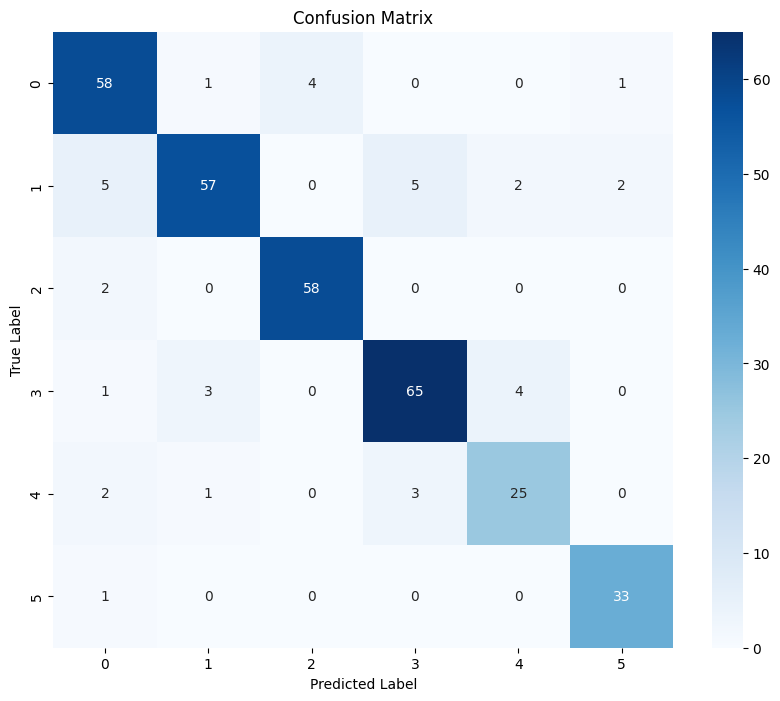


Classification Report:
              precision    recall  f1-score   support

     Neutral       0.84      0.91      0.87        64
       Happy       0.92      0.80      0.86        71
         Sad       0.94      0.97      0.95        60
    Surprise       0.89      0.89      0.89        73
       Angry       0.81      0.81      0.81        31
        Fear       0.92      0.97      0.94        34

    accuracy                           0.89       333
   macro avg       0.88      0.89      0.89       333
weighted avg       0.89      0.89      0.89       333


F1 Scores:
Micro F1: 0.889
Macro F1: 0.887
Weighted F1: 0.888


In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Set device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Selected device is {device}')



# Load the best model (if you saved it during training)
num_emotions = np.unique(Y_test).shape[0]
input_height = 128  # Height of your spectrograms
model = EmotionRecognitionModel(num_emotions, input_height).to(device)
model.load_state_dict(torch.load('best_model.pth'))
BATCH_SIZE = 32
# Prepare the test dataset and DataLoader
test_dataset = TensorDataset(torch.tensor(X_test).float(), torch.tensor(Y_test).long())
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

# Define the loss function (assuming it's the same as used during training)
loss_fn = nn.CrossEntropyLoss()

# Test function
def test_model(model, loader, loss_fn, device):
    model.eval()
    total_loss = 0
    correct_preds = 0
    total_samples = 0
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for X_batch, Y_batch in loader:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            outputs = model(X_batch)
            loss = loss_fn(outputs, Y_batch)

            total_loss += loss.item() * X_batch.size(0)
            _, predicted = torch.max(outputs.data, 1)
            correct_preds += (predicted == Y_batch).sum().item()
            total_samples += Y_batch.size(0)

            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(Y_batch.cpu().numpy())

    avg_loss = total_loss / total_samples
    accuracy = (correct_preds / total_samples) * 100

    return avg_loss, accuracy, all_predictions, all_labels

# Run the test
test_loss, test_acc, predictions, labels = test_model(model, test_loader, loss_fn, device)
print(f'Test loss: {test_loss:.3f}')
print(f'Test accuracy: {test_acc:.2f}%')

# Compute and plot confusion matrix
cm = confusion_matrix(labels, predictions)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report (includes precision, recall, f1-score)
emotion_labels = ['Neutral', 'Happy', 'Sad', 'Surprise', 'Angry', 'Fear'] 
print("\nClassification Report:")
print(classification_report(labels, predictions, target_names=emotion_labels))

# If you want to calculate F1 scores separately
from sklearn.metrics import f1_score

# Micro F1 score (calculated globally)
micro_f1 = f1_score(labels, predictions, average='micro')
# Macro F1 score (calculated for each label then averaged)
macro_f1 = f1_score(labels, predictions, average='macro')
# Weighted F1 score (calculated for each label and weighted by support)
weighted_f1 = f1_score(labels, predictions, average='weighted')

print("\nF1 Scores:")
print(f"Micro F1: {micro_f1:.3f}")
print(f"Macro F1: {macro_f1:.3f}")
print(f"Weighted F1: {weighted_f1:.3f}")

In [14]:
# Ensure you have the necessary imports
# from your model and training code

# Set device (assuming 'device' is already defined)
# device = 'cuda' if torch.cuda.is_available() else 'cpu'



# Test function
def test_model(model, loader, loss_fn, device):
    model.eval()
    total_loss = 0
    correct_preds = 0
    total_samples = 0
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for X_batch, Y_batch in loader:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            outputs = model(X_batch)
            loss = loss_fn(outputs, Y_batch)

            # Accumulate loss and accuracy
            total_loss += loss.item() * X_batch.size(0)
            _, predicted = torch.max(outputs.data, 1)
            correct_preds += (predicted == Y_batch).sum().item()
            total_samples += Y_batch.size(0)

            # Store predictions and labels for further analysis if needed
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(Y_batch.cpu().numpy())

    avg_loss = total_loss / total_samples
    accuracy = (correct_preds / total_samples) * 100

    return avg_loss, accuracy, all_predictions, all_labels

# Run the test
test_loss, test_acc, predictions, labels = test_model(model, test_loader, loss_fn, device)
print(f'Test loss: {test_loss:.3f}')
print(f'Test accuracy: {test_acc:.2f}%')

Test loss: 0.468
Test accuracy: 85.37%


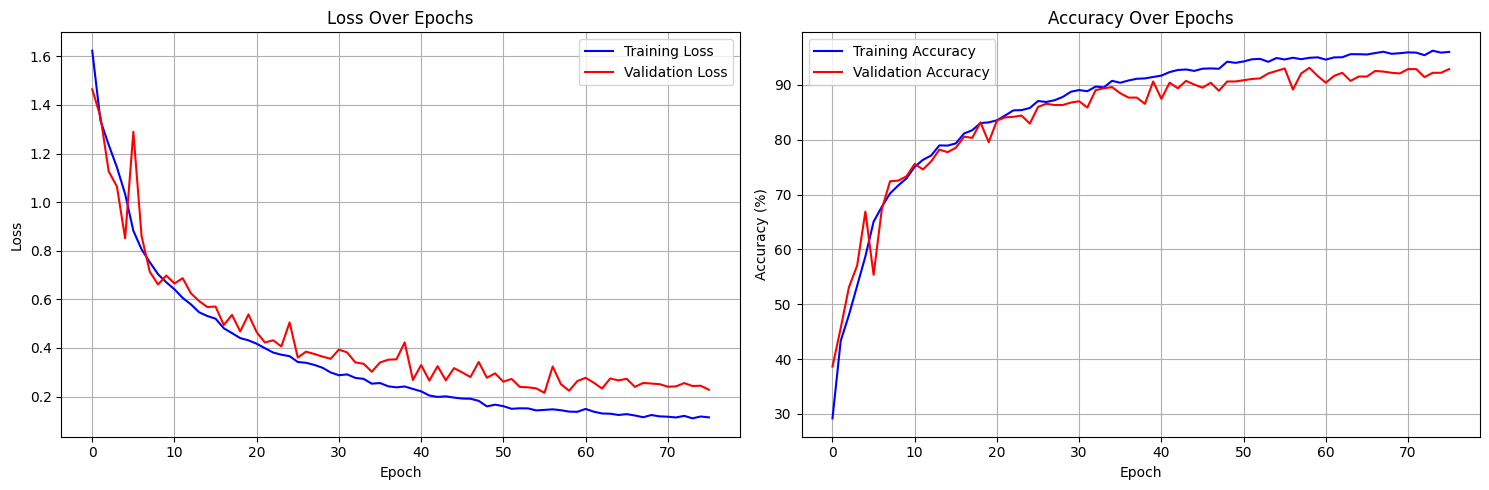

In [15]:
# Create subplots for loss and accuracy
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot losses
axes[0].plot(train_losses, 'b-', label='Training Loss')
axes[0].plot(val_losses, 'r-', label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss Over Epochs')
axes[0].legend()
axes[0].grid(True)

# Plot accuracies
axes[1].plot(train_accuracies, 'b-', label='Training Accuracy')
axes[1].plot(val_accuracies, 'r-', label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy (%)')
axes[1].set_title('Accuracy Over Epochs')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [2]:
import numpy as np

def save_datasets(X_train, X_val, X_test, Y_train, Y_val, Y_test, filename='dataset'):
    """
    Save training, validation and test sets
    
    Parameters:
    X_train, X_val, X_test: Features for train, validation and test sets
    y_train, y_val, y_test: Labels for train, validation and test sets
    filename: Name of the file to save (without extension)
    """
    np.savez(filename,
             X_train=X_train,
             X_val=X_val,
             X_test=X_test,
             Y_train=Y_train,
             Y_val=Y_val,
             Y_test=Y_test)
    print(f"Datasets saved to {filename}.npz")

def load_datasets(filename='dataset'):
    """
    Load training, validation and test sets
    
    Parameters:
    filename: Name of the file to load (without extension)
    
    Returns:
    X_train, X_val, X_test, y_train, y_val, y_test
    """
    data = np.load(f"{filename}.npz")
    return (data['X_train'], data['X_val'], data['X_test'],
            data['Y_train'], data['Y_val'], data['Y_test'])


    # Save datasets
#save_datasets(X_train, X_val, X_test, Y_train, Y_val, Y_test, 'my_datasets')

# Load datasets
X_train, X_val, X_test, Y_train, Y_val, Y_test = load_datasets('my_datasets')

X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape

((7830, 1, 128, 626),
 (333, 1, 128, 626),
 (333, 1, 128, 626),
 (7830,),
 (333,),
 (333,))

In [24]:
X_train[0].reshape(128, -1).shape

(128, 626)